In [2]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os


os.chdir('../Dataset')
path = os.getcwd()


columns = ['class','l_shoulder','r_shoulder','l_arm','r_arm','l_hip','r_hip','l_knee','r_knee']

y82_test = pd.read_csv(os.path.join(path,'y82_testing.csv'), header=None)
y82_train = pd.read_csv(os.path.join(path,'y82_training.csv'), header=None)
L_test = pd.read_csv(os.path.join(path,'L_testing.csv'), header=None)
L_train = pd.read_csv(os.path.join(path,'L_training.csv'), header=None)

combined_test = pd.concat([L_test, y82_test])
combined_train = pd.concat([L_train, y82_train])

combined_test.columns = columns 
combined_train.columns = columns 

combined_test['class'], classes = pd.factorize(combined_test['class'])
combined_train['class'], _ = pd.factorize(combined_train['class'])

classes = list(classes)

In [3]:
all_combined_df = pd.concat([y82_train, y82_test, L_test, L_train])
all_combined = pd.concat([combined_test, combined_train])

def split_features_labels(df):
    return df.drop('class', axis=1), df['class']

# Random Forest Classifer
# 88-89% Maybe 90?

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5] END ......max_depth=3, n_estimators=17;, score=0.730 total time=   0.1s[CV 4/5] END ......max_depth=3, n_estimators=17;, score=0.747 total time=   0.1s
[CV 1/5] END ......max_depth=3, n_estimators=17;, score=0.781 total time=   0.1s

[CV 5/5] END ......max_depth=3, n_estimators=17;, score=0.733 total time=   0.1s
[CV 2/5] END ......max_depth=3, n_estimators=17;, score=0.714 total time=   0.1s
[CV 1/5] END .......max_depth=5, n_estimators=8;, score=0.864 total time=   0.0s
[CV 3/5] END .......max_depth=5, n_estimators=8;, score=0.864 total time=   0.0s
[CV 2/5] END .......max_depth=5, n_estimators=8;, score=0.853 total time=   0.0s
[CV 4/5] END .......max_depth=5, n_estimators=8;, score=0.838 total time=   0.0s
[CV 5/5] END .......max_depth=5, n_estimators=8;, score=0.847 total time=   0.0s
[CV 1/5] END ......max_depth=5, n_estimators=58;, score=0.869 total time=   0.2s
[CV 2/5] END ......max_depth=5, n_estimators=58;

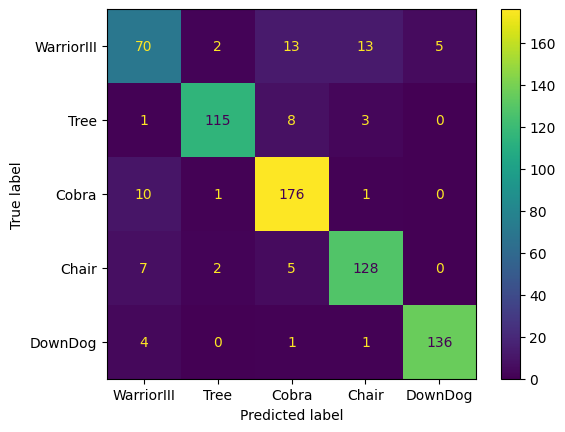

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import train_test_split // Don't need anymore

RANDOM_ORDER_DATA = True 
MAX_ESTIMATORS = 100
MAX_DEPTH = 8 

if RANDOM_ORDER_DATA:
  mutated_train = combined_train.sample(frac=1)
else:
  mutated_train = combined_train

X_train, y_train = split_features_labels(mutated_train)
X_test, y_test = split_features_labels(combined_test)


forest_classifier = RandomForestClassifier()
param_grid = {'n_estimators' : np.arange(1, MAX_ESTIMATORS),
              'max_depth' : np.arange(1, MAX_DEPTH),
            }

forest_classifier_gscv = RandomizedSearchCV(forest_classifier, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=3)

#fit model to data
forest_classifier_gscv.fit(X_train, y_train)

MAX_DEPTH = forest_classifier_gscv.best_params_['max_depth']
N_ESTIMATORS = forest_classifier_gscv.best_params_['n_estimators']

best_forest = RandomForestClassifier(max_depth=MAX_DEPTH, n_estimators=N_ESTIMATORS)
best_forest.fit(X_train, y_train)

pred = best_forest.predict(X_test)
cm = confusion_matrix(y_test, pred)
display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display_confusion_matrix.plot()
print(classification_report(y_test, pred))

# KNN Classifer 
# Eh Around 88%


Fitting 5 folds for each of 123 candidates, totalling 615 fits
[CV 1/5] END ..algorithm=kd_tree, n_neighbors=1;, score=0.900 total time=   0.0s
[CV 2/5] END ..algorithm=kd_tree, n_neighbors=1;, score=0.900 total time=   0.0s
[CV 3/5] END ..algorithm=kd_tree, n_neighbors=1;, score=0.891 total time=   0.0s
[CV 4/5] END ..algorithm=kd_tree, n_neighbors=1;, score=0.922 total time=   0.0s
[CV 5/5] END ..algorithm=kd_tree, n_neighbors=1;, score=0.894 total time=   0.0s
[CV 1/5] END ..algorithm=kd_tree, n_neighbors=2;, score=0.908 total time=   0.0s
[CV 2/5] END ..algorithm=kd_tree, n_neighbors=2;, score=0.903 total time=   0.0s
[CV 3/5] END ..algorithm=kd_tree, n_neighbors=2;, score=0.891 total time=   0.0s
[CV 4/5] END ..algorithm=kd_tree, n_neighbors=2;, score=0.922 total time=   0.0s
[CV 5/5] END ..algorithm=kd_tree, n_neighbors=2;, score=0.897 total time=   0.0s
[CV 1/5] END ..algorithm=kd_tree, n_neighbors=3;, score=0.900 total time=   0.0s
[CV 2/5] END ..algorithm=kd_tree, n_neighbors=

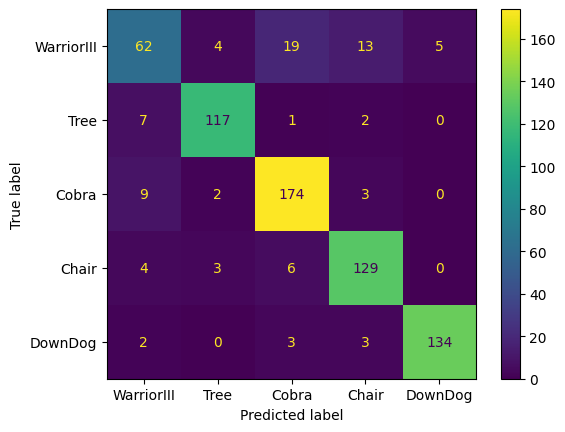

In [40]:
# Grid searching best hyper params 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNN 

''' Don't need to do this anymore, cause the dataset is already split (Didn't realise this) '''
# from sklearn.model_selection import train_test_split
# 80/20 Split of data, Doesn't randomize, Randomsplit ensures the proportion of classes is the same. 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
RANDOM_ORDER_DATA = True 



'''Shuffle data for better resuliting'''
if RANDOM_ORDER_DATA:
    mutated_train = combined_train.sample(frac=1)
else:
    mutated_train = combined_train

X_train, y_train = split_features_labels(mutated_train)
X_test, y_test = split_features_labels(combined_test)

max_neighbours = int(np.sqrt(len(X_train)))
knn_algorithms = ['kd_tree', 'brute', 'ball_tree']


knn = KNN()

param_grid = {'n_neighbors' : np.arange(1, max_neighbours),
              'algorithm' : knn_algorithms}

# Using grid search cross validation to find the best value of K 
knn_gscv = GridSearchCV(knn, param_grid, cv=5, verbose=3)

knn_gscv.fit(X_train, y_train)

ALGORITHM = knn_gscv.best_params_['algorithm']
N_NEIGHBORS = knn_gscv.best_params_['n_neighbors']

best_KNN = KNN(algorithm=ALGORITHM, n_neighbors=N_NEIGHBORS)
best_KNN.fit(X_train, y_train)

print(f"Fitted KNN Classifer with {ALGORITHM=} and {N_NEIGHBORS=}")


pred = best_KNN.predict(X_test)
cm = confusion_matrix(y_test, pred)
display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display_confusion_matrix.plot()
print(classification_report(y_test, pred))

# NN Classifier
## About 87-89% Acc - okay


In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

'''Shuffle data for better resuliting'''
RANDOM_ORDER_DATA = True 
if RANDOM_ORDER_DATA:
    mutated_train = combined_train.sample(frac=1)
else:
    mutated_train = combined_train

X_train, y_train = split_features_labels(mutated_train)
X_test, y_test = split_features_labels(combined_test)

# Define the parameter distributions to sample from
param_dist = {
    'hidden_layer_sizes' : [(i, j) for i in range(1, 15) for j in range(1, 15)],
    'solver': ['adam', 'lbfgs'],
    'activation': ['relu', 'logistic'],
    'alpha' : [0.0001, 0.0001, 0.00005]
}

# Initialize MLPClassifier with default values
mlp = MLPClassifier(max_iter=10000)

random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=3)

# Train the classifier on your data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = random_search.best_params_
print("Best solver: ", best_params['solver'])
print("Best activation: ", best_params['activation'])
print("Layers: ", best_params['hidden_layer_sizes'] )
print("Alpha: ", best_params['alpha'])

# Use the best hyperparameters to initialize the MLPClassifier
best_mlp = MLPClassifier(solver=best_params['solver'], activation=best_params['activation'], alpha=best_params['alpha'], hidden_layer_sizes=best_params['hidden_layer_sizes'], max_iter=1000)

# Train the MLPClassifier on the training data
best_mlp.fit(X_train, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 2/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(13, 7), solver=lbfgs;, score=0.228 total time=   0.1s
[CV 1/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(13, 7), solver=lbfgs;, score=0.228 total time=   0.1s
[CV 5/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(13, 7), solver=lbfgs;, score=0.162 total time=   0.2s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 8), solver=lbfgs;, score=0.344 total time=   0.8s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 8), solver=lbfgs;, score=0.708 total time=   0.9s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 8), solver=lbfgs;, score=0.376 total time=   1.4s
[CV 3/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(8, 7), solver=lbfgs;, score=0.766 total time=   3.7s
[CV 4/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(8, 7), solver=lbfgs;, score=0.710 total time=   3.5s
[CV 4/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(13, 7), solver=lbfgs;, score=0.677 total time=   5.5s
[CV 1/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(8, 7), solver=lbfgs;, score=0.833 total time=   5.6s
[CV 5/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(8, 7), solver=lbfgs;, score=0.655 total time=   2.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 8

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(6, 3), solver=lbfgs;, score=0.655 total time=   2.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(6, 12), solver=lbfgs;, score=0.372 total time=   1.8s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 6), solver=adam;, score=0.560 total time=   4.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 4), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 6), solver=adam;, score=0.749 total time=   4.1s
[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(5, 3), solver=adam;, score=0.613 total time=   6.9s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 6), solver=adam;, score=0.713 total time=   4.6s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 4), solver=lbfgs;, score=0.403 total time=   2.1s
[CV 4/5] END activation=logistic, alpha=0.00

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 5), solver=lbfgs;, score=0.783 total time=  28.2s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 5), solver=lbfgs;, score=0.822 total time=  28.5s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 5), solver=lbfgs;, score=0.714 total time=  29.6s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 5), solver=lbfgs;, score=0.669 total time=  29.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 5), solver=lbfgs;, score=0.721 total time=  29.7s
[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 12), solver=lbfgs;, score=0.733 total time=  18.3s
[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 4), solver=adam;, score=0.794 total time=   4.3s
[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 4), solver=adam;, score=0.819 total time=   4.8s
[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 4), solver=adam;, score=0.847 total time=   4.5s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2), solver=adam;, score=0.225 total time=   1.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2), solver=adam;, score=0.198 total time=   1.5s
[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 4), solver=adam;, score=0.769 total time=   6.5s
[CV 4/5] END activation=relu, alpha=0.0001, h

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 12), solver=lbfgs;, score=0.711 total time=  38.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 6), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 6), solver=lbfgs;, score=0.272 total time=   0.6s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 8), solver=lbfgs;, score=0.738 total time=   4.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 6), solver=lbfgs;, score=0.696 total time=   2.0s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 12), solver=lbfgs;, score=0.725 total time=  38.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 8), solver=lbfgs;, score=0.760 total time=   5.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 8), solver=lbfgs;, score=0.577 total time=   5.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 8), solver=adam;, score=0.756 total time=   2.7s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 8), solver=lbfgs;, score=0.814 total time=  11.9s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 6), solver=lbfgs;, score=0.557 total time=   7.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 6), solver=lbfgs;, score=0.788 total time=   5.5s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 8), solver=adam;, score=0.883 total time=   5.6s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 12), solver=lbfgs;, score=0.774 total time=  45.2s
[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 2), solver=lbfgs;, score=0.608 total time=  17.4s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 12), solver=lbfgs;, score=0.760 total time=  46.7s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 14), solver=lbfgs;, score=0.842 total time=  13.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 14), solver=lbfgs;, score=0.792 total time=   6.9s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 14), solver=lbfgs;, score=0.716 total time=   2.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 14), solver=lbfgs;, score=0.747 total time=   7.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(6, 6), solver=adam;, score=0.767 total time=   3.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(6, 6), solver=adam;, score=0.774 total time=   2.9s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(6, 6), solver=adam;, score=0.767 total time=   4.3s
[CV 3/5] END activation=relu, alpha=0.0001, hi

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 10), solver=lbfgs;, score=0.597 total time=  29.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 1), solver=adam;, score=0.226 total time=   0.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 1), solver=adam;, score=0.239 total time=   0.7s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 10), solver=lbfgs;, score=0.290 total time=   1.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 1), solver=adam;, score=0.231 total time=   0.6s
[CV 3/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(14, 4), solver=adam;, score=0.716 total time=   3.8s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 1), solver=adam;, score=0.226 total time=   0.7s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 10), solver=lbfgs;, score=0.752 total time=  29.6s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 10), solver=lbfgs;, score=0.694 total time=  28.4s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 14), solver=adam;, score=0.682 total time=   1.7s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 14), solver=adam;, score=0.749 total time=   2.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 14), solver=adam;, score=0.702 total time=   2.7s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 14), solver=adam;, score=0.747 total time=   3.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 14), solver=adam;, score=0.753 total time=   3.6s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), solver=adam;, score=0.628 total time=   3.7s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), solver=adam;, score=0.226 total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidde

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 12), solver=lbfgs;, score=0.678 total time=  22.6s
[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(6, 13), solver=adam;, score=0.627 total time=   3.5s
[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(6, 13), solver=adam;, score=0.794 total time=   2.4s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 12), solver=lbfgs;, score=0.758 total time=  23.2s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 12), solver=lbfgs;, score=0.730 total time=  23.1s
[CV 1/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 6), solver=adam;, score=0.319 total time=   1.5s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 12), solver=lbfgs;, score=0.571 total time=  24.0s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 12), solver=lbfgs;, score=0.685 total time=  23.6s
[CV 3/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 6), solver=adam;, score=0.234 total time=   0.5s
[CV 2/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 6), solver=adam;, score=0.242 total time=   0.8s
[CV 4/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 6), solver=adam;, score=0.418 total time=   0.6s
[CV 5/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 6), solver=adam;, score=0.226 total time=   0.4s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 8), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 8), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 8), solver=lbfgs;, score=0.350 total time=   1.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_laye

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 6), solver=lbfgs;, score=0.750 total time=  22.9s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=0.617 total time=  17.1s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 6), solver=lbfgs;, score=0.708 total time=  23.2s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 6), solver=lbfgs;, score=0.739 total time=  24.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(8, 9), solver=adam;, score=0.839 total time=   3.6s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 6), solver=lbfgs;, score=0.791 total time=  24.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=0.493 total time=  15.1s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 6), solver=lbfgs;, score=0.663 total time=  24.8s
[CV 2/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(6, 2), solver=adam;, score=0.231 total time=   1.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(8, 9), solver=adam;, score=0.769 total time=   1.6s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(8, 9), solver=adam;, score=0.800 total time=   3.3s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 9), solver=lbfgs;, score=0.228 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 9), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 9), solver=lbfgs;, score=0.353 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 9), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 4/5] END activation=relu, alpha=5e-05, hidd

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(5, 8), solver=lbfgs;, score=0.669 total time=  18.5s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(1, 10), solver=adam;, score=0.425 total time=   1.5s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(5, 8), solver=lbfgs;, score=0.586 total time=  19.8s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(1, 10), solver=adam;, score=0.554 total time=   2.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), solver=adam;, score=0.827 total time=   2.7s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), solver=adam;, score=0.758 total time=   2.8s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), solver=adam;, score=0.794 total time=   2.9s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13, 5), solver=adam;, score=0.856 total time=   2.6s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), solver=adam;, score=0.791 total time=   3.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), solver=adam;, score=0.861 total time=   3.0s
[CV 2/5] END activation=logistic, alp

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 12), solver=lbfgs;, score=0.700 total time=  21.4s
[CV 5/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(7, 11), solver=adam;, score=0.721 total time=   1.0s
[CV 1/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(7, 11), solver=adam;, score=0.750 total time=   5.2s
[CV 4/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(7, 11), solver=adam;, score=0.749 total time=   2.7s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 12), solver=lbfgs;, score=0.719 total time=  22.4s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 12), solver=lbfgs;, score=0.596 total time=  22.2s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(11, 4), solver=lbfgs;, score=0.703 total time=  21.6s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(11, 4), solver=lbfgs;, score=0.644 total time=  21.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(11, 4), solver=lbfgs;, score=0.760 total time=  21.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 4), solver=adam;, score=0.692 total time=   2.9s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 13), solver=lbfgs;, score=0.711 total time=  28.0s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 13), solver=lbfgs;, score=0.739 total time=  28.5s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning:

[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 13), solver=lbfgs;, score=0.708 total time=  28.9s
[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 13), solver=lbfgs;, score=0.763 total time=  29.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 3), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 3), solver=lbfgs;, score=0.228 total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 3), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 3), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 13), solver=lbfgs;, score=0.735 total time=  28.5s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 3), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, 

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(11, 4), solver=lbfgs;, score=0.719 total time=  20.9s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.228 total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(11, 4), solver=lbfgs;, score=0.660 total time=  20.8s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 9), solver=adam;, score=0.225 total time=   0.2s
[CV 5/5] END activation=relu, alpha=5e-05, hidden_lay

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 4), solver=lbfgs;, score=0.708 total time=  21.8s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 1), solver=lbfgs;, score=0.733 total time=  20.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 4), solver=lbfgs;, score=0.736 total time=  22.8s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 4), solver=lbfgs;, score=0.799 total time=  21.8s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 4), solver=lbfgs;, score=0.613 total time=  21.5s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 8), solver=lbfgs;, score=0.379 total time=   0.9s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 4), solver=lbfgs;, score=0.749 total time=  22.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 11), solver=lbfgs;, score=0.392 total time=   1.4s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 11), solver=lbfgs;, score=0.479 total time=   2.3s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 8), solver=lbfgs;, score=0.504 total time=   7.7s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 8), solver=lbfgs;, score=0.722 total time=  19.9s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 11), solver=lbfgs;, score=0.365 total time=   3.8s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 4), solver=adam;, score=0.786 total time=   3.1s
[CV 1/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(5, 3), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 4), solver=adam;, score=0.775 total time=   4.0s
[CV 3/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(5, 3), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 4/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(5, 3), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 11), solver=lbfgs;, score=0.393 total time=   5.7s
[CV 5/5] END activation=relu, alpha=5e-05, hidd

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(7, 14), solver=lbfgs;, score=0.597 total time=   1.3s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 6), solver=adam;, score=0.791 total time=   3.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 6), solver=adam;, score=0.844 total time=   3.4s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 6), solver=adam;, score=0.838 total time=   3.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 11), solver=lbfgs;, score=0.731 total time=  19.5s
[CV 2/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(7, 14), solver=lbfgs;, score=0.794 total time=   3.3s
[CV 3/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(7, 14), solver=lbfgs;, score=0.735 total time=   3.2s
[CV 5/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(7, 14), solver=lbfgs;, score=0.604 total time=   3.1s
[CV 2/5] END activation=logistic, alpha=0.0001,

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(8, 14), solver=lbfgs;, score=0.769 total time=  24.9s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 8), solver=adam;, score=0.833 total time=   3.7s
[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(8, 14), solver=lbfgs;, score=0.691 total time=  25.1s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 8), solver=adam;, score=0.772 total time=   3.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(8, 14), solver=lbfgs;, score=0.730 total time=  25.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 8), solver=adam;, score=0.735 total time=   4.5s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 6), solver=adam;, score=0.786 total time=   2.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 8), solver=adam;, score=0.791 total time=   3.3s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 12), solver=lbfgs;, score=0.560 total time=  13.7s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 6), solver=adam;, score=0.819 total time=   3.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 6), solver=adam;, score=0.792 total time=   4.1s
[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(4, 9), solver=lbfgs;, score=0.544 total time=   1.8s
[CV 4/5] END activation=logistic, alpha=

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 12), solver=lbfgs;, score=0.749 total time=  20.7s
[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(4, 9), solver=lbfgs;, score=0.468 total time=   7.5s
[CV 1/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(7, 9), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 2/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(7, 9), solver=lbfgs;, score=0.719 total time=   3.4s
[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(4, 9), solver=lbfgs;, score=0.617 total time=  13.7s
[CV 3/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(7, 9), solver=lbfgs;, score=0.758 total time=   2.7s
[CV 5/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(7, 9), solver=lbfgs;, score=0.852 total time=   3.7s
[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(4, 9), solver=lbfgs;, score=0.702 total time=  18.2s
[CV 4/5] END activation=relu, alpha=5e-05, hidden_laye

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(13, 11), solver=lbfgs;, score=0.764 total time=  26.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(13, 11), solver=lbfgs;, score=0.786 total time=  27.1s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(13, 11), solver=lbfgs;, score=0.766 total time=  26.7s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(13, 11), solver=lbfgs;, score=0.719 total time=  26.2s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(13, 11), solver=lbfgs;, score=0.774 total time=  24.3s
Best solver:  adam
Best activation:  logistic
Layers:  (14, 6)
Alpha:  0.0001


MLPClassifier(activation='logistic', hidden_layer_sizes=(14, 6), max_iter=1000)

              precision    recall  f1-score   support

           0       0.65      0.48      0.55       103
           1       0.94      0.94      0.94       127
           2       0.85      0.92      0.88       188
           3       0.83      0.85      0.84       142
           4       0.95      0.99      0.97       142

    accuracy                           0.86       702
   macro avg       0.84      0.84      0.84       702
weighted avg       0.85      0.86      0.85       702



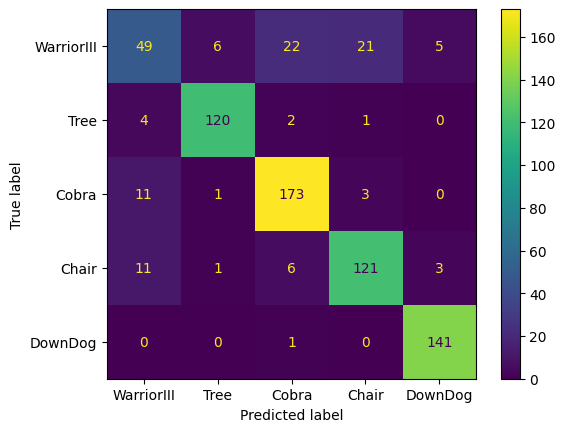

In [17]:
# Use the best hyperparameters to initialize the MLPClassifier
best_mlp = MLPClassifier(solver=best_params['solver'], activation=best_params['activation'], alpha=best_params['alpha'], hidden_layer_sizes=best_params['hidden_layer_sizes'], max_iter=1000)

# Train the MLPClassifier on the training data
best_mlp.fit(X_train, y_train)

pred = best_mlp.predict(X_test)
cm = confusion_matrix(y_test, pred)
display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display_confusion_matrix.plot()
print(classification_report(y_test, pred))

# SVC Grid Search Classifer
## Consistent 90% Sometimes 91%

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ................C=0.1, gamma=scale;, score=0.833 total time=   0.1s
[CV 2/5] END ................C=0.1, gamma=scale;, score=0.864 total time=   0.1s
[CV 3/5] END ................C=0.1, gamma=scale;, score=0.841 total time=   0.1s
[CV 4/5] END ................C=0.1, gamma=scale;, score=0.819 total time=   0.1s
[CV 5/5] END ................C=0.1, gamma=scale;, score=0.822 total time=   0.1s
[CV 1/5] END ..................C=1, gamma=scale;, score=0.900 total time=   0.1s
[CV 2/5] END ..................C=1, gamma=scale;, score=0.917 total time=   0.1s
[CV 3/5] END ..................C=1, gamma=scale;, score=0.889 total time=   0.1s
[CV 4/5] END ..................C=1, gamma=scale;, score=0.883 total time=   0.1s
[CV 5/5] END ..................C=1, gamma=scale;, score=0.861 total time=   0.1s
[CV 1/5] END ..................C=5, gamma=scale;, score=0.889 total time=   0.1s
[CV 2/5] END ..................C=5, gamma=scale;,

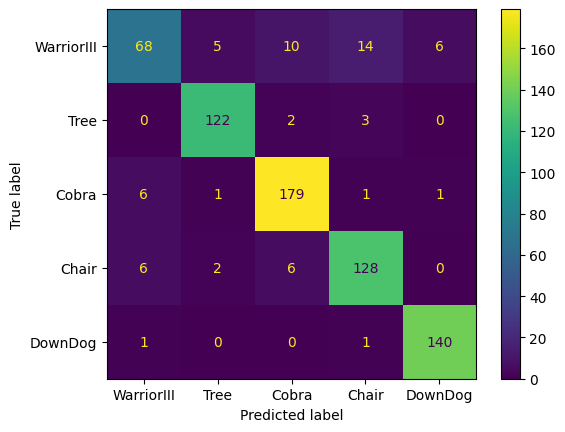

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.svm import SVC

RANDOM_ORDER_DATA = True 
RANDOM_CV = False

'''Shuffle data for better resuliting'''
if RANDOM_ORDER_DATA:
    mutated_train = combined_train.sample(frac=1)
else:
    mutated_train = combined_train

X_train, y_train = split_features_labels(mutated_train)
X_test, y_test = split_features_labels(combined_test)

svm = SVC(kernel='rbf') 


'''Tried search for gamma manually but it appears using scale is just better''' 
n_features = X_train.shape[1]
gamma_start = 1 / (n_features * max(X_train.var()))
gamma_step = 0.005
gamma_end = gamma_start + (10 * gamma_step)

### Doing Grid Search Now ###

gamma_range = np.arange(gamma_start, gamma_end, gamma_step)
C_range = [0.1, 1, 5, 10]
# set the parameter grid for grid search
param_grid = {
        'C': C_range,
        'gamma' : ['scale']
    }

# perform grid search
if RANDOM_CV:
    grid = RandomizedSearchCV(svm, cv=5, param_distributions=param_grid, verbose=3)
else:
    grid = GridSearchCV(svm, cv=5, param_grid=param_grid, verbose=3)
grid.fit(X_train, y_train)

# best parameters and score
print("Best parameters:", grid.best_params_)
print("Best Score: ", grid.best_score_)

best_svc = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], probability=True)

best_svc.fit(X_train, y_train)

''' Plotting '''

pred = best_svc.predict(X_test)
cm = confusion_matrix(y_test, pred)
display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display_confusion_matrix.plot()
print(classification_report(y_test, pred))

# Video & Classifer Integration

In [5]:
import cv2
import mediapipe as mp
import numpy as np
import time 

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

MIN_DETECTION_CONFIDENCE = 0.5
MIN_TRACKING_CONFIDENCE = 0.5

# All landmark except for hand and face specific
RelevantLandmarks = list(mp_pose.PoseLandmark)[11:17] + list(mp_pose.PoseLandmark)[23:29]

l_hip_landmark_angle_idx = (11,23,25)
r_hip_landmark_angle_idx = (12,24,26)

l_shoulder_landmark_angle_idx = (13,11,23)
r_shoulder_landmark_angle_idx = (14,12,24)

l_arm_landmark_angle_idx = (15,13,11)
r_arm_landmark_angle_idx = (16,14,12)

l_knee_landmark_angle_idx = (23,25,27)
r_knee_landmark_angle_idx = (24,26,28)

#Match idx of RelevantLandmarks 
angle_idxs_required = [
    l_shoulder_landmark_angle_idx,
    r_shoulder_landmark_angle_idx,
    
    l_arm_landmark_angle_idx,
    r_arm_landmark_angle_idx,
    
    l_hip_landmark_angle_idx,
    r_hip_landmark_angle_idx,
    
    l_knee_landmark_angle_idx,
    r_knee_landmark_angle_idx
]
skip_landmark = {
    mp_pose.PoseLandmark.RIGHT_ANKLE,
    mp_pose.PoseLandmark.LEFT_ANKLE,
    mp_pose.PoseLandmark.RIGHT_WRIST,
    mp_pose.PoseLandmark.LEFT_WRIST
}

In [6]:
landmarkStr = {
    mp_pose.PoseLandmark.NOSE : "NOSE",
    mp_pose.PoseLandmark.LEFT_EYE_INNER : "LEFT_EYE_INNER",
    mp_pose.PoseLandmark.LEFT_EYE : "LEFT_EYE",
    mp_pose.PoseLandmark.LEFT_EYE_OUTER : "LEFT_EYE_OUTER",
    mp_pose.PoseLandmark.RIGHT_EYE_INNER : "RIGHT_EYE_INNER",
    mp_pose.PoseLandmark.RIGHT_EYE : "RIGHT_EYE",
    mp_pose.PoseLandmark.RIGHT_EYE_OUTER : "RIGHT_EYE_OUTER",
    mp_pose.PoseLandmark.LEFT_EAR : "LEFT_EAR",
    mp_pose.PoseLandmark.RIGHT_EAR : "RIGHT_EAR",
    mp_pose.PoseLandmark.MOUTH_LEFT : "MOUTH_LEFT",
    mp_pose.PoseLandmark.MOUTH_RIGHT : "MOUTH_RIGHT",
    mp_pose.PoseLandmark.LEFT_SHOULDER : "LEFT_SHOULDER",
    mp_pose.PoseLandmark.RIGHT_SHOULDER : "RIGHT_SHOULDER",
    mp_pose.PoseLandmark.LEFT_ELBOW : "LEFT_ELBOW",
    mp_pose.PoseLandmark.RIGHT_ELBOW : "RIGHT_ELBOW",
    mp_pose.PoseLandmark.LEFT_WRIST : "LEFT_WRIST",
    mp_pose.PoseLandmark.RIGHT_WRIST : "RIGHT_WRIST",
    mp_pose.PoseLandmark.LEFT_PINKY : "LEFT_PINKY",
    mp_pose.PoseLandmark.RIGHT_PINKY : "RIGHT_PINKY",
    mp_pose.PoseLandmark.LEFT_INDEX : "LEFT_INDEX",
    mp_pose.PoseLandmark.RIGHT_INDEX : "RIGHT_INDEX",
    mp_pose.PoseLandmark.LEFT_THUMB : "LEFT_THUMB",
    mp_pose.PoseLandmark.RIGHT_THUMB : "RIGHT_THUMB",
    mp_pose.PoseLandmark.LEFT_HIP : "LEFT_HIP",
    mp_pose.PoseLandmark.RIGHT_HIP : "RIGHT_HIP",
    mp_pose.PoseLandmark.LEFT_KNEE : "LEFT_KNEE",
    mp_pose.PoseLandmark.RIGHT_KNEE : "RIGHT_KNEE",
    mp_pose.PoseLandmark.LEFT_ANKLE : "LEFT_ANKLE",
    mp_pose.PoseLandmark.RIGHT_ANKLE : "RIGHT_ANKLE",
    mp_pose.PoseLandmark.LEFT_HEEL : "LEFT_HEEL",
    mp_pose.PoseLandmark.RIGHT_HEEL : "RIGHT_HEEL",
    mp_pose.PoseLandmark.LEFT_FOOT_INDEX : "LEFT_FOOT_INDEX",
    mp_pose.PoseLandmark.RIGHT_FOOT_INDEX : "RIGHT_FOOT_INDEX"
}

def calc_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)    
    c = np.array(c)   
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 380-angle 
    
    return angle 

In [12]:
def classify_pose(example, classifer):
    example = pd.DataFrame(np.array(example).reshape(1, -1), columns=columns[1:])
    

    if classifer == 'KNN':
        probabilty_classes = best_KNN.predict_proba(example)
    elif classifer == 'Forest':
        probabilty_classes = best_forest.predict_proba(example)
    elif classifer == 'SVM':
        probabilty_classes = best_svc.predict_proba(example)
    elif classifer == 'NN':
        probabilty_classes = best_mlp.predict_proba(example)
    else:
        raise Exception("Please enter valid classifer. Currently only ('KNN' | 'Forest' | 'NN' | 'SVM')")

    
    prob_predicted_classes = [] 
    for class_idx, prob in enumerate(probabilty_classes[0]):
        prob_predicted_classes.append((classes[class_idx], prob))
        
    prob_predicted_classes.sort(key = lambda x: x[1], reverse=True)
    
    # Get the highest predicted class 
    predicted_class = prob_predicted_classes[0]
    
    return (predicted_class, sorted(prob_predicted_classes, key = lambda x: x[1], reverse=True))

# Sanity test classification 
classify_pose([8.390697637127042, 13.364568331384618, 16.49759248897499, 153.50000646379374, 173.20291493738577, 199.52935190007366, 179.00845878279233, 198.25172013734928], classifer='SVM')

(('Tree', 0.38120570092899037),
 [('Tree', 0.38120570092899037),
  ('DownDog', 0.2645860484116833),
  ('Cobra', 0.223151273618488),
  ('WarriorIII', 0.10685287277735046),
  ('Chair', 0.024204104263487784)])

In [22]:
CLASSIFIER = 'NN'

# Create two windows to display the images
cv2.namedWindow("Real Image", cv2.WINDOW_NORMAL)
cv2.namedWindow("Pose Skeleton", cv2.WINDOW_NORMAL)
last_class = ''

''' Using the media pose model'''
with mp_pose.Pose(min_detection_confidence=MIN_DETECTION_CONFIDENCE, min_tracking_confidence=MIN_TRACKING_CONFIDENCE) as pose:
    '''
        Capturing webcam footage 
    '''
    cap = cv2.VideoCapture(0) # this is the magic!

    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
    while cap.isOpened():
        suc, frame = cap.read() 
        if not suc:
            print("Frame empty..")
            continue 
        
        #Recolor image 
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detections 
        results = pose.process(image=image)
        pose_landmarks = results.pose_landmarks
        try: 

            ''' Converting landmarks into angles'''
            pose_relevant_landmark_angles = []
            # Going through all relevant landmarks, extracting their key angles
            # Calculating the angle then adding to array 
            for i1, i2, i3 in angle_idxs_required:
                
                fst = (pose_landmarks.landmark[i1].x, pose_landmarks.landmark[i1].y)
                snd = (pose_landmarks.landmark[i2].x, pose_landmarks.landmark[i2].y)
                thrd = (pose_landmarks.landmark[i3].x, pose_landmarks.landmark[i3].y)
                
                
                pose_relevant_landmark_angles.append(calc_angle(fst, snd, thrd))
            #Getting cords of the landmarks FOR ANGLES WE CALC'D CORDS FOR
            pose_relevant_landmark_cords = [[pose_landmarks.landmark[idx].x, pose_landmarks.landmark[idx].y]
                                            for _, idx, _ in angle_idxs_required if idx not in skip_landmark]
            
            pose_relevant_landmark_angles_visual = np.around(pose_relevant_landmark_angles, 2).astype(str).tolist()
            
            ''' CLASSIFICATION OF POSE''' 
            predicted_pose, prob_predictions = classify_pose(pose_relevant_landmark_angles, CLASSIFIER)
            
            ''' Pose Threshold'''

            if (predicted_pose[1] >= 0.70):
                if last_class != predicted_pose:
                    last_class = predicted_pose
                    print(predicted_pose)
            else:
                if last_class != 'None':
                    last_class = 'None'
                    print("No Pose Detected")
            
            print(f'PROBAS: {prob_predictions}')

            ''' First Window '''
            #Revert image color 
            image.flags.writeable = True 
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            #Render detections 
            mp_drawing.draw_landmarks(
                image, 
                results.pose_landmarks, 
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(50, 145, 168), circle_radius=2, thickness=2),
                mp_drawing.DrawingSpec(color=(209, 192, 42), circle_radius=2, thickness=2)
            )
            
            cv2.putText(image, 
                            predicted_pose[0],
                            tuple(np.multiply([640//2,480//2], [640, 480]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA 
                        ) 
            
            ''' Second Window '''
            black_image = np.zeros((frame.shape[0], frame.shape[1], 3), np.uint8)

            # Render detections on the black image
            mp_drawing.draw_landmarks(
                black_image, 
                results.pose_landmarks, 
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(50, 145, 168), circle_radius=2, thickness=2),
                mp_drawing.DrawingSpec(color=(209, 192, 42), circle_radius=2, thickness=2)
            )
        
        except Exception as e:
            print(e)
            
        # Display the two images side by side
        result = np.concatenate((image, black_image), axis=1)
        # cv2.imshow("Pose Skeleton", black_image)
        # cv2.imshow("Real Image", image)|
        cv2.imshow("Image & Skele", result)


        # Closing the video capture  
        if cv2.waitKey(1) & 0xFF == ord('w'):
            break
    
    
cap.release() 
cv2.destroyAllWindows()

('Cobra', 0.8634786486645922)
PROBAS: [('Cobra', 0.8634786486645922), ('Chair', 0.059858946954142074), ('Tree', 0.04288196242982805), ('WarriorIII', 0.026216128110651108), ('DownDog', 0.0075643138407864964)]
('Cobra', 0.924632336848341)
PROBAS: [('Cobra', 0.924632336848341), ('Chair', 0.033440789032103985), ('Tree', 0.026104380197634575), ('WarriorIII', 0.010872317038678329), ('DownDog', 0.004950176883242197)]
('Cobra', 0.7804700237826981)
PROBAS: [('Cobra', 0.7804700237826981), ('Chair', 0.08642406352392433), ('Tree', 0.06911425714897068), ('WarriorIII', 0.045730564957199696), ('DownDog', 0.018261090587207023)]
('Cobra', 0.9035743136429405)
PROBAS: [('Cobra', 0.9035743136429405), ('Chair', 0.043972129068902244), ('Tree', 0.030899831000182558), ('WarriorIII', 0.015029614053480229), ('DownDog', 0.006524112234494357)]
('Cobra', 0.7795914765694264)
PROBAS: [('Cobra', 0.7795914765694264), ('Chair', 0.08837248024331008), ('Tree', 0.06793886033110728), ('WarriorIII', 0.04582066020196375), ('